# Climate dataset

This dataset is composed of two different wikipedia tables (link below) that gives for every country the average yearly temperature and the avergae precipitation per year. In total 175 countries are described in this dataset. 


https://en.wikipedia.org/wiki/List_of_countries_by_average_annual_precipitation

https://en.wikipedia.org/wiki/List_of_countries_by_average_yearly_temperature

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

precipitation = pd.read_csv('data/Precipitation_per_year.csv')
temperature = pd.read_csv('data/average_yearly_temp.csv')

precipitation = precipitation.dropna()
temperature = temperature.dropna()

In [77]:
climate = pd.merge(precipitation, temperature, on='Country')
climate = climate.drop(columns=['Rank', 'Continent'])
climate.rename(columns={'Average yearly temperature (1961–1990 Celsius)': 'Average yearly temperature [C°]', 'Average precipitation (mm in depth per year)': 'Averge precipitation [mm/year]'}, inplace=True)
#convert string columns to float columns
climate['Average yearly temperature [C°]'] = pd.to_numeric(climate['Average yearly temperature [C°]'], errors='coerce', downcast='float')
climate['Averge precipitation [mm/year]'] = pd.to_numeric(climate['Averge precipitation [mm/year]'], errors='coerce', downcast='float')
climate.head()

,Country,Averge precipitation [mm/year],Average yearly temperature [C°]
0,Colombia,3240.0,24.50
1,São Tomé and Príncipe,3200.0,23.75
2,Papua New Guinea,3142.0,25.25
3,Solomon Islands,3028.0,25.65
4,Panama,2928.0,25.40


In [78]:
climate.Country.unique().shape

(175,)

In [79]:
#delete spaces before and after country names
climate['Country'] = climate['Country'].str.strip()
#print all countries
print(climate.Country.unique())
#replace 'United States' with 'United States of America'
climate['Country'] = climate['Country'].str.replace('United States', 'United States of America')

['Colombia' 'São Tomé and Príncipe' 'Papua New Guinea' 'Solomon Islands'
 'Panama' 'Costa Rica' 'Samoa' 'Malaysia' 'Brunei' 'Indonesia'
 'Bangladesh' 'Fiji' 'Sierra Leone' 'Singapore' 'Liberia' 'Guyana'
 'Philippines' 'Suriname' 'Seychelles' 'Saint Lucia' 'Nicaragua' 'Ecuador'
 'Bhutan' 'Trinidad and Tobago' 'Equatorial Guinea' 'Myanmar' 'Dominica'
 'Jamaica' 'Venezuela' 'Mauritius' 'Vanuatu' 'Guatemala' 'Honduras'
 'Maldives' 'Iceland' 'Cambodia' 'Laos' 'Gabon' 'Vietnam' 'El Salvador'
 'Brazil' 'Peru' 'New Zealand' 'Sri Lanka' 'Belize' 'Japan' 'Guinea'
 'Thailand' 'Cameroon' 'Saint Vincent and the Grenadines' 'Guinea-Bissau'
 'Switzerland' 'Chile' 'Madagascar' 'Nepal' 'Albania' 'Haiti'
 'Saint Kitts and Nevis' 'Barbados' 'Norway' 'Dominican Republic'
 'Ivory Coast' 'Central African Republic' 'Cuba' 'Uruguay' 'Bahamas'
 'Burundi' 'South Korea' 'United Kingdom' 'Rwanda' 'Ghana' 'Malawi'
 'Uganda' 'Togo' 'Slovenia' 'Nigeria' 'Bolivia' 'Paraguay' 'Ireland'
 'Croatia' 'Austria' 'India' 'Ta

## Visualization of the dataset

In [80]:
import geopandas as gpd

# Load a shapefile of country boundaries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

C:\Users\JPMONIATTE\AppData\Local\Temp\ipykernel_19796\2216653612.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [81]:
world = world.merge(climate, left_on='name', right_on='Country', how='left')
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country,Averge precipitation [mm/year],Average yearly temperature [C°]
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,2592.0,24.40
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,1071.0,22.35
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,537.0,NaN
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America,715.0,8.55


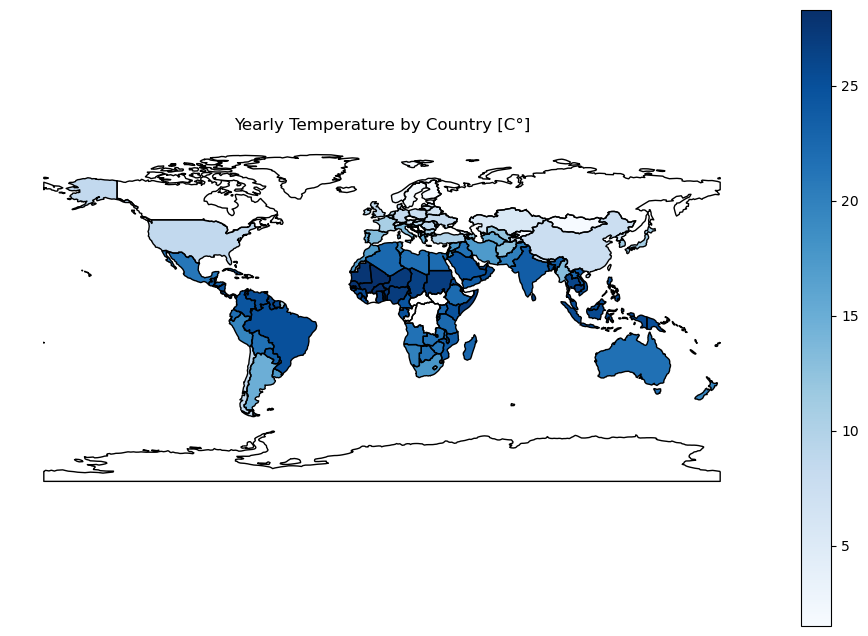

In [82]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.set_title('Yearly Temperature by Country [C°]')
ax.set_axis_off()

# Plot the data using GeoPandas plot function
world.boundary.plot(ax=ax, linewidth=1, color='black')  # Draw country boundaries
world.plot(column='Average yearly temperature [C°]', ax=ax, legend=True, cmap='Blues')
plt.show()


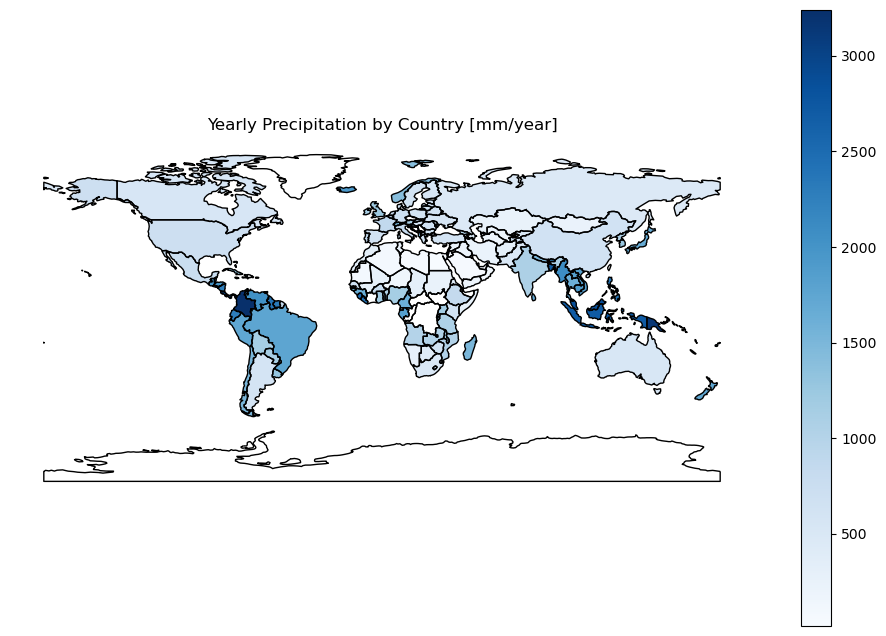

In [83]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.set_title('Yearly Precipitation by Country [mm/year]')
ax.set_axis_off()

# Plot the data using GeoPandas plot function
world.boundary.plot(ax=ax, linewidth=1, color='black')  # Draw country boundaries
world.plot(column='Averge precipitation [mm/year]', ax=ax, legend=True, cmap='Blues')
plt.show()